### Model 1:

A single Dense Hidden Layer

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [40]:
data = pd.read_csv("Student_performance_data _.csv")


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [42]:
# Your code here

dataset = data.drop(columns=["StudentID","Gender","Ethnicity"])

In [43]:
# Your code here

print(dataset.isnull().sum())

Age                  0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [44]:
# Your code here

X = dataset.drop(columns=['GPA'])
y = dataset['GPA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = StandardScaler().fit_transform(X_train)

X_test = StandardScaler().fit_transform(X_test)

In [45]:
# Your code here

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),                            
    Dense(1)                  
])



In [46]:
# Your code here

model.compile(
    optimizer='sgd',
    loss='mse', 
    metrics=['mae']  
)

In [47]:
# Your code here

history = model.fit(X_train, y_train, epochs=75, batch_size=100, validation_split=0.2)

Epoch 1/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.0024 - mae: 1.4674 - val_loss: 0.6140 - val_mae: 0.6591
Epoch 2/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5051 - mae: 0.5864 - val_loss: 0.3210 - val_mae: 0.4633
Epoch 3/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2705 - mae: 0.4210 - val_loss: 0.2202 - val_mae: 0.3806
Epoch 4/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2056 - mae: 0.3568 - val_loss: 0.1738 - val_mae: 0.3339
Epoch 5/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1482 - mae: 0.3056 - val_loss: 0.1506 - val_mae: 0.3128
Epoch 6/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1311 - mae: 0.2857 - val_loss: 0.1349 - val_mae: 0.2984
Epoch 7/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1189 - mae: 0.2728 - val_loss: 0.1237 - val_mae: 0.2880
Epoch 8/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1155 - mae: 0.2613 - val_loss: 0.1145 - val_mae: 0.2759
Epoch 9/75
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1046 - mae:

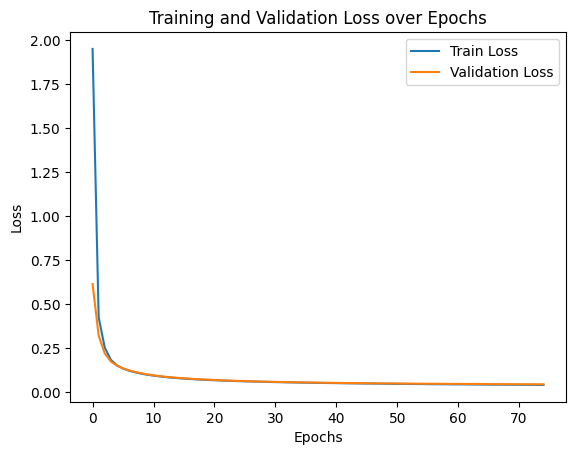

In [48]:
# Your code here

history_df = pd.DataFrame(history.history)



plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




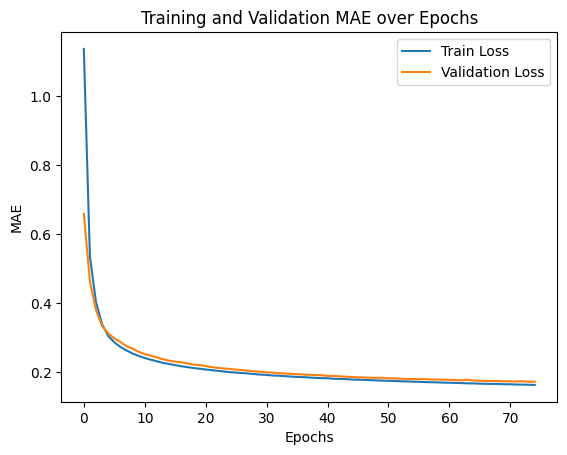

In [49]:
plt.plot(history_df['mae'], label='Train Loss')
plt.plot(history_df['val_mae'], label='Validation Loss')
plt.title('Training and Validation MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [50]:
# Your code here
loss, mae = model.evaluate(X_test, y_test)
print("loss", loss)
print("mae", mae)
#print("mae", mae)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0500 - mae: 0.1753 
loss 0.04856504127383232
mae 0.17544113099575043


In [51]:
# Your code here

predictions = model.predict(X_test)

# for i in range(len(y_test)):
#     print(f'Prediction: {predictions[i,0]} Actual: {y_test.iloc[i]}')
#plt.scatter(X_test, y_test)
#plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


#### Model 2:
A set of three Dense Hidden Layers.

In [52]:
dataset2 = data.drop(columns=["StudentID","Gender","Ethnicity","Extracurricular","Music","Sports","Volunteering"])

X2 = dataset2.drop(columns=['GPA'])
y2 = dataset2['GPA'].values

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

scaler = StandardScaler() 
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

model2 = Sequential([
    Input(shape=(X2_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),    
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),           
    Dense(1)                  
])

model2.compile(
    optimizer='sgd',
    loss='mse', 
    metrics=['mae']  
)

history2 = model2.fit(X2_train, y2_train, epochs=75, batch_size=100, validation_split=0.20)

loss2, mae2 = model2.evaluate(X2_test, y2_test)
print("loss", loss2)
print("mae", mae2)

Epoch 1/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.6839 - mae: 1.3348 - val_loss: 0.4936 - val_mae: 0.5950
Epoch 2/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3895 - mae: 0.5097 - val_loss: 0.2899 - val_mae: 0.4405
Epoch 3/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2355 - mae: 0.3862 - val_loss: 0.2194 - val_mae: 0.3817
Epoch 4/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1880 - mae: 0.3410 - val_loss: 0.1844 - val_mae: 0.3415
Epoch 5/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1656 - mae: 0.3195 - val_loss: 0.1619 - val_mae: 0.3211
Epoch 6/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1482 - mae: 0.3031 - val_loss: 0.1464 - val_mae: 0.3064
Epoch 7/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1305 - mae: 0.2878 - val_loss: 0.1344 - val_mae: 0.2943
Epoch 8/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1204 - mae: 0.2767 - val_loss: 0.1244 - val_mae: 0.2843
Epoch 9/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1082 - mae:

#### Model 3:
Add a dropout layer after each Dense Hidden Layer.

In [53]:
dataset3 = data.drop(columns=["StudentID","Gender","Ethnicity","Extracurricular","Music","Sports","Volunteering"])

X3 = dataset3.drop(columns=['GPA'])
y3 = dataset3['GPA'].values

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

scaler = StandardScaler() 
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.transform(X3_test)

model3 = Sequential([
    Input(shape=(X3_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'), 
    Dropout(0.2), 
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),           
    Dense(1)                  
])

model3.compile(
    optimizer='sgd',
    loss='mse', 
    metrics=['mae']  
)

history3 = model3.fit(X3_train, y3_train, epochs=75, batch_size=100, validation_split=0.2)

loss3, mae3 = model3.evaluate(X3_test, y3_test)
print("loss", loss3)
print("mae", mae3)

Epoch 1/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.7064 - mae: 1.4102 - val_loss: 0.6244 - val_mae: 0.6893
Epoch 2/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7600 - mae: 0.6982 - val_loss: 0.3352 - val_mae: 0.4940
Epoch 3/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5693 - mae: 0.5912 - val_loss: 0.2581 - val_mae: 0.4325
Epoch 4/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4964 - mae: 0.5613 - val_loss: 0.2252 - val_mae: 0.4002
Epoch 5/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4785 - mae: 0.5458 - val_loss: 0.1935 - val_mae: 0.3624
Epoch 6/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4300 - mae: 0.5088 - val_loss: 0.1906 - val_mae: 0.3645
Epoch 7/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4421 - mae: 0.5146 - val_loss: 0.1819 - val_mae: 0.3551
Epoch 8/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3661 - mae: 0.4777 - val_loss: 0.1699 - val_mae: 0.3404
Epoch 9/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3448 - mae:

#### Model 4:
Add a Batch Normalization Layer after each Dropout Layer.

In [54]:
dataset4 = data.drop(columns=["StudentID","Gender","Ethnicity","Extracurricular","Music","Sports","Volunteering"])

X4 = dataset4.drop(columns=['GPA'])
y4 = dataset4['GPA'].values

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

scaler = StandardScaler() 
X4_train = scaler.fit_transform(X4_train)
X4_test = scaler.transform(X4_test)

model4 = Sequential([
    Input(shape=(X4_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'), 
    BatchNormalization(), 
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),      
    Dense(1)                  
])

model4.compile(
    optimizer='sgd',
    loss='mse', 
    metrics=['mae']  
)

history4 = model4.fit(X4_train, y4_train, epochs=75, batch_size=100, validation_split=0.2)

loss4, mae4 = model4.evaluate(X4_test, y4_test)
print("loss", loss4)
print("mae", mae4)

Epoch 1/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.3189 - mae: 1.8409 - val_loss: 1.9769 - val_mae: 1.1805
Epoch 2/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5801 - mae: 1.0102 - val_loss: 1.0119 - val_mae: 0.8437
Epoch 3/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0944 - mae: 0.8141 - val_loss: 0.7354 - val_mae: 0.7285
Epoch 4/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7861 - mae: 0.6890 - val_loss: 0.6248 - val_mae: 0.6762
Epoch 5/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6074 - mae: 0.6124 - val_loss: 0.5514 - val_mae: 0.6321
Epoch 6/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5518 - mae: 0.5724 - val_loss: 0.5093 - val_mae: 0.6031
Epoch 7/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4499 - mae: 0.5241 - val_loss: 0.4763 - val_mae: 0.5776
Epoch 8/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4062 - mae: 0.5060 - val_loss: 0.4484 - val_mae: 0.5576
Epoch 9/75
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3717 - mae:

In [55]:
X_test_sample = X_test[:5]
y_test_sample = y_test[:5]

X_test_sample2 = X2_test[:5]
X_test_sample3 = X3_test[:5]
X_test_sample4 = X4_test[:5]


predictions_model = model.predict(X_test_sample)
predictions_model2 = model2.predict(X_test_sample2)
predictions_model3 = model3.predict(X_test_sample3)
predictions_model4 = model4.predict(X_test_sample4)


resultados = pd.DataFrame({
    'Real': y_test_sample,
    'Predicción 1': predictions_model.flatten(),
    'Predicción 2': predictions_model2.flatten(),
    'Predicción 3': predictions_model3.flatten(),
    'Predicción 4': predictions_model4.flatten()
})


tabla_loss = pd.DataFrame({
    'Modelo': [1,2,3,4],
    'HL1': [64,32,32,32],
    'HL2': ['N/A', 32, 32, 32],
    'HL3': ['N/A', 16, 16, 16],
    'Dropout': ['N/A', 'N/A', 0.2, 0.2],
    'Batch Normalization': ['No', 'No', 'No', 'Yes'],
    'Loss': [loss, loss2, loss3, loss4],
    'MAE': [mae, mae2, mae3, mae4]
})




print(tabla_loss)
print(resultados)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
   Modelo  HL1  HL2  HL3 Dropout Batch Normalization      Loss       MAE
0       1   64  N/A  N/A     N/A                  No  0.048565  0.175441
1       2   32   32   16     N/A                  No  0.056612  0.187022
2       3   32   32   16     0.2                  No  0.088422  0.238559
3       4   32   32   16     0.2                 Yes  0.059689  0.190699
          Real  Predicción 1  Predicción 2  Predicción 3  Predicción 4
1004  1.427724      1.452365      1.353066      1.398511      1.442788
196   3.117354      2.896932      2.976997      2.837823      2.809906
2342  2.037769      1.934368      1.882544      2.077992      2.045974
1708  3.548521      3.504259      3.804189      3.286250      3.531145
435   0.248977      0.203818      0.377287      0.681251      0.400420


### Conlusión:

Podemos observar que los cambios de híperparametros tienen cambios significativos en los resultados obtenidos por el modelo. Si nuestro objetivo es obtener un modelo con la menor cantidad de errores absolutos, la mejor opción es el modelo más simple, el primero. El modelo con una sola capa oculta obtuvo un error de solo el 17% mientras que el peor modelo fue el tercero con 3 capas ocultas y un dropout de 0.2 después de cada capa, la pérdida del 20% de neuronas afecta significativamente la precisión del modelo ya que no toma en cuenta la complejidad de nuestros datos. 

In [56]:
!jupyter nbconvert --to html "C:\Users\oskga\Documents\AI Deep Learning\Dropout & Batch\Student_performance.ipynb"

[NbConvertApp] Converting notebook C:\Users\oskga\Documents\AI Deep Learning\Dropout & Batch\Student_performance.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 461816 bytes to C:\Users\oskga\Documents\AI Deep Learning\Dropout & Batch\Student_performance.html
